# Kaggle1. Titanic

## 1. What is the problems?
- Predict who are survived.

## 2. EDA

### 2-1) Load the datasets

In [1]:
import pandas as pd
import numpy as np

train_set = pd.read_csv('./input/train.csv')
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2-2) Feature selections
- Candidates
 - Pclass : categorical data
 - Sex : categorical data
 - Age : real value and considering seperate the sections
 - SibSp : real value
 - Parch : real value
 - Fare : real value
 - Embark : categorical data

> Pclass

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

mpl.RcParams.update({'font.size': 22, 'figure.figsize': (20, 10)})
plt.style.use('ggplot')

In [3]:
green_cmap = sns.light_palette("green", as_cmap=True)
pd.crosstab(train_set.Pclass, train_set.Survived, margins=True)\
.style.background_gradient(cmap=green_cmap)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- <U>If class level is higher, the ratio of Survived is increase.</U>
 - 1 Pclass : 136 / 216
 - 2 Pclass : 87 / 184
 - 3 Pclass : 119 / 491

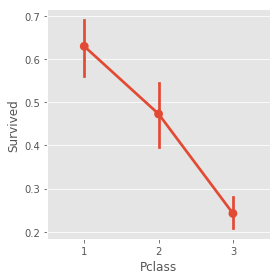

In [4]:
sns.factorplot('Pclass', 'Survived', data = train_set)

So, use **Pclass** as a feature.

> Sex

In [5]:
sex_perc = train_set[["Sex", "Survived"]].groupby("Sex", as_index=False).mean()

- The ratio of Survived is much higher in female.

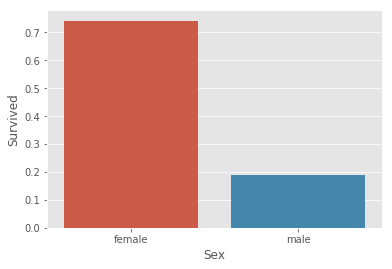

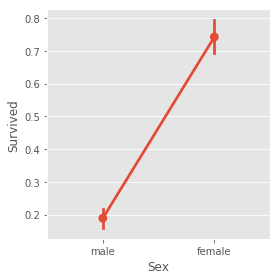

In [6]:
sns.barplot(x="Sex", y="Survived", data=sex_perc)
sns.factorplot("Sex", "Survived", data=train_set)

- <U>The ratio of Survived is higher in female.</U>

So, use the **Sex** as a feature.

> Age

In [7]:
age_percent = train_set[["Age", "Survived"]].groupby("Age", as_index=False).mean()

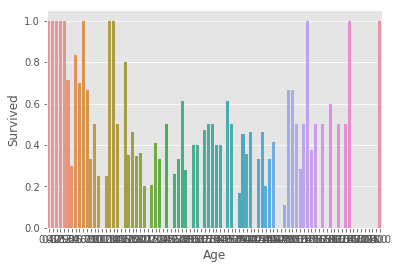

In [8]:
sns.barplot("Age", "Survived", data=age_percent)

In [9]:
# divide age sections.
train_set["Age_sec"] = np.nan
for i in range(10, 0, -1):
    train_set.loc[train_set["Age"] <= i*10, "Age_sec"] = i*10
    
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_sec
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,40.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,30.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,40.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,40.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,60.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,10.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,30.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,20.0


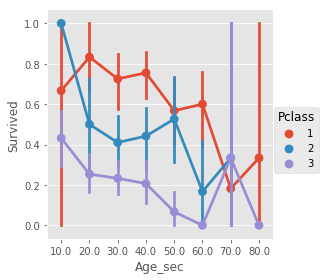

In [10]:
sns.factorplot("Age_sec", "Survived", hue="Pclass", data=train_set)

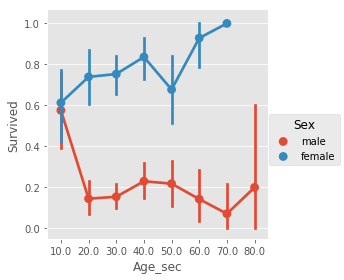

In [11]:
sns.factorplot("Age_sec", "Survived", hue="Sex", data=train_set)

- The count of Survived is more higher in Young, old people.
 - When Pclass is higher, the ratio of Survived is higher on whole age section.
 - In case of male, the 10s, 30s, 40s, 80s are higher.
 - In case of female, 60s, 70s are higher.
- Age affects to the Survived and dependant to Sex or Pclass.

So, use the **Age** as a feature.

> SibSp and Parch

In [12]:
# SibSp -> Sex could affect!
pd.crosstab([train_set.Survived, train_set.Sex], train_set.SibSp, margins=True)\
.style.background_gradient(cmap=green_cmap)

In [13]:
pd.crosstab([train_set.Survived, train_set.Sex], train_set.Parch, margins=True)\
.style.background_gradient(cmap=green_cmap)

- Male without parents, child, sibling, spouse died more than others.

So, use **SibSp** and **Parch** as features.

> Fare
- This is related to Pclass, so check the correlations and then select.

> Embarked

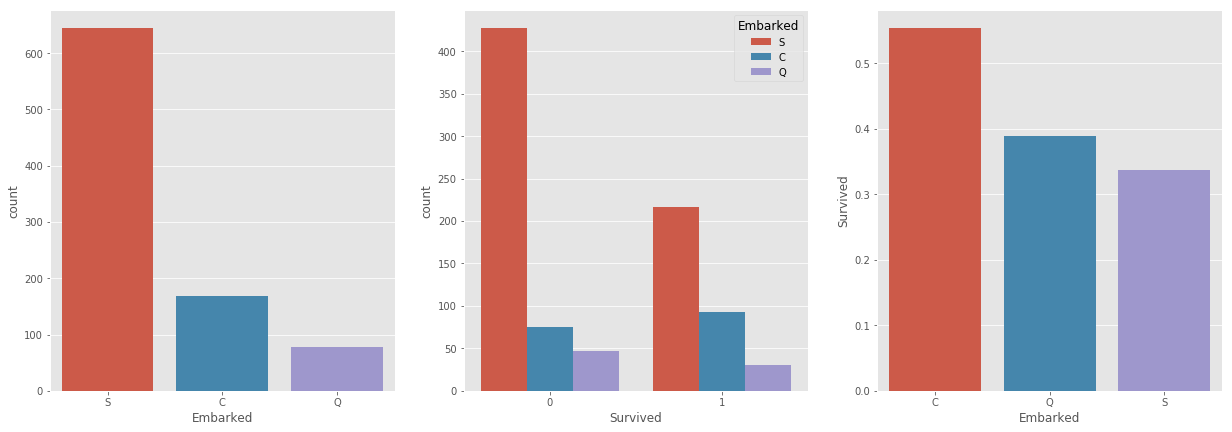

In [14]:
embarked_perc = train_set[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean()

fig, (axes_1, axes_2, axes_3) = plt.subplots(1, 3, figsize=(21, 7))

sns.countplot(x="Embarked", data=train_set, ax=axes_1)
sns.countplot(x="Survived", hue="Embarked", data=train_set, order=[0, 1], ax=axes_2)
sns.barplot(x="Embarked", y="Survived", data=embarked_perc, ax=axes_3)

- C is higher.

So, use **Embarked** as a feature.

### 2-3. Checking correlations.

In [15]:
temp_df = train_set[["Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]]
categorical_features = ["Sex", "Emabrked"]
selected_df = pd.get_dummies(temp_df, categorical_features)

selected_df.head(10)

,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Emabrked_C,Emabrked_Q,Emabrked_S
0,22.0,1,0,7.2500,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,1,0,1,0,0
2,26.0,0,0,7.9250,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,0,1
5,NaN,0,0,8.4583,0,0,1,0,1,0
6,54.0,0,0,51.8625,0,0,1,0,0,1
7,2.0,3,1,21.0750,0,0,1,0,0,1
8,27.0,0,2,11.1333,1,1,0,0,0,1
9,14.0,1,0,30.0708,1,1,0,1,0,0


In [16]:
selected_df.describe()

,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Emabrked_C,Emabrked_Q,Emabrked_S
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838,0.352413,0.647587,0.188552,0.086420,0.722783
std,14.526497,1.102743,0.806057,49.693429,0.486592,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Prepocessing NaN value
selected_df["Age"] = selected_df["Age"].fillna(selected_df["Age"].mean())

In [18]:
selected_df.describe()

,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Emabrked_C,Emabrked_Q,Emabrked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838,0.352413,0.647587,0.188552,0.086420,0.722783
std,13.002015,1.102743,0.806057,49.693429,0.486592,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


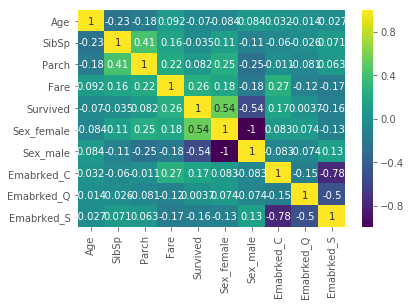

In [19]:
correlation = selected_df.corr()
sns.heatmap(correlation, cmap="viridis", annot=True)

**Use this training data sets.**

### 2-4 PCA

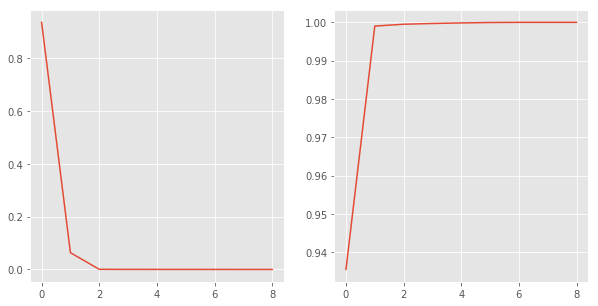

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None, random_state=20180408)
pca.fit(selected_df.drop("Survived", axis=1))

# importance of features
var = pca.explained_variance_ratio_
fig, (axes_1, axes_2) = plt.subplots(1, 2, figsize=(10, 5))

var_cum_sum = np.cumsum(var)

axes_1.plot(var)
axes_2.plot(var_cum_sum)

Actually, we just can use 4~5 features for prediction.

## 3. Modeling with full feature

### 3-1 Scaling (Making the 0 avg and 1 std)

In [21]:
# Be careful. Do not use normalizer of sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

labels = selected_df["Survived"]
features = selected_df.drop("Survived", axis=1)

scaler.fit(features)
scaled_features = scaler.transform(features)

print(features)
print(scaled_features)

print(features.std())
print(scaled_features.std())

           Age  SibSp  Parch      Fare  Sex_female  Sex_male  Emabrked_C  \
0    22.000000      1      0    7.2500           0         1           0   
1    38.000000      1      0   71.2833           1         0           1   
2    26.000000      0      0    7.9250           1         0           0   
3    35.000000      1      0   53.1000           1         0           0   
4    35.000000      0      0    8.0500           0         1           0   
5    29.699118      0      0    8.4583           0         1           0   
6    54.000000      0      0   51.8625           0         1           0   
7     2.000000      3      1   21.0750           0         1           0   
8    27.000000      0      2   11.1333           1         0           0   
9    14.000000      1      0   30.0708           1         0           1   
10    4.000000      1      1   16.7000           1         0           0   
11   58.000000      0      0   26.5500           1         0           0   
12   20.0000

### 3-2 Splitting data set into train data and test data.

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, labels, random_state=20180408, test_size=0.3)

In [23]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

623
623
268
268


### 3-3 Selection models
 - Logistic regression
 - Random forest
 - SVM

In [24]:
from sklearn.metrics import accuracy_score, classification_report

> **Logistic regression**

In [25]:
from sklearn.linear_model import LogisticRegression

# 1. Model fitting
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
# 2. Prediction
logistic_pred = logistic_model.predict(x_test)

In [27]:
# 3. Accuracy
print(accuracy_score(y_test, logistic_pred))
print(classification_report(y_test, logistic_pred))

0.7723880597014925
             precision    recall  f1-score   support

          0       0.81      0.83      0.82       166
          1       0.71      0.68      0.69       102

avg / total       0.77      0.77      0.77       268



> **Random forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier

# 1. Model fitting
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
# 2. Prediction
random_forest_pred = random_forest_model.predict(x_test)

In [30]:
# 3. Accuracy
print(accuracy_score(y_test, random_forest_pred))
print(classification_report(y_test, random_forest_pred))

0.7835820895522388
             precision    recall  f1-score   support

          0       0.81      0.86      0.83       166
          1       0.74      0.67      0.70       102

avg / total       0.78      0.78      0.78       268



> **SVM**

In [31]:
from sklearn.svm import SVC

# 1. Model fitting
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
# 2. Prediction
svm_pred = svm_model.predict(x_test)

In [33]:
# 3. Accuracy
print(accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

0.8097014925373134
             precision    recall  f1-score   support

          0       0.83      0.87      0.85       166
          1       0.77      0.72      0.74       102

avg / total       0.81      0.81      0.81       268



## 4. Modeling with dimension reduction

In [34]:
pca = PCA(n_components=5, random_state=20180408)
pca.fit(selected_df.drop("Survived", axis=1))

reduced_features = pca.transform(selected_df.drop("Survived", axis=1))

In [35]:
scaler.fit(reduced_features)
scaled_reduced_features = scaler.transform(reduced_features)

In [36]:
x_r_train, x_r_test, y_r_train, y_r_test =\
train_test_split(scaled_reduced_features, labels, random_state=20180408, test_size=0.3)

> **SVM**

In [37]:
# 1. Model fitting
svm_model_r = SVC()
svm_model_r.fit(x_r_train, y_r_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
# 2. Prediction
svm_r_pred = svm_model_r.predict(x_r_test)

In [39]:
# 3. Accuracy
print(accuracy_score(y_r_test, svm_r_pred))
print(classification_report(y_r_test, svm_r_pred))

0.8022388059701493
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       166
          1       0.76      0.71      0.73       102

avg / total       0.80      0.80      0.80       268



## 5. Prepare submit

### 5-1 Non PCA

In [40]:
test_set = pd.read_csv('./input/test.csv')

In [41]:
temp_df = test_set[["Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
selected_test_df = pd.get_dummies(temp_df, categorical_features)

selected_test_df.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Emabrked_C,Emabrked_Q,Emabrked_S
count,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,30.272590,0.447368,0.392344,35.627188,0.363636,0.636364,0.244019,0.110048,0.645933
std,14.181209,0.896760,0.981429,55.907576,0.481622,0.481622,0.430019,0.313324,0.478803
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000
max,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Fill NaN
selected_test_df["Age"] = selected_test_df["Age"].fillna(selected_test_df["Age"].mean())
selected_test_df["Fare"] = selected_test_df["Fare"].fillna(selected_test_df["Fare"].mean())

In [43]:
scaler.fit(selected_test_df)
scaled_test_features = scaler.transform(selected_test_df)

In [44]:
# Logistic
logistic_test_pred = logistic_model.predict(scaled_test_features)
# Random Forest
random_forest_test_pred = random_forest_model.predict(scaled_test_features)
#SVM
svm_test_pred = svm_model.predict(scaled_test_features)

In [45]:
logistic_submission = pd.DataFrame({'PassengerId':range(892, 1310), 'Survived': logistic_test_pred})
logistic_submission.to_csv('logistic_submission.csv', index=False)

random_forest_submission = pd.DataFrame({'PassengerId':range(892, 1310), 'Survived': random_forest_test_pred})
random_forest_submission.to_csv('random_forest_submission.csv', index=False)

svm_submission = pd.DataFrame({'PassengerId':range(892, 1310), 'Survived': svm_test_pred})
svm_submission.to_csv('svm_submission.csv', index=False)

In [46]:
# using PCA
reduced_test_features = pca.transform(selected_test_df)
scaler.fit(reduced_test_features)
scaled_reduced_features = scaler.transform(reduced_test_features)

svm_model_2 = SVC()
svm_model_2.fit(x_r_train, y_r_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
svm_r_test_pred = svm_model_2.predict(scaled_reduced_features)

svm_pca_submission = pd.DataFrame({'PassengerId':range(892, 1310), 'Survived': svm_r_test_pred})
svm_pca_submission.to_csv('svm_pca_submission.csv', index=False)